In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd
%matplotlib inline

In [62]:
DATA_FILE = "data/Farmers_edited data 21.12.2020_IPS_FINAL- WEKA_JM.xlsx"

In [77]:
# Create dataframe
df = pd.read_excel(DATA_FILE, header=0, engine='openpyxl', na_values=['?'], usecols=range(81), 
                   skiprows=[i for i in range(150,155)])

In [80]:
# Show data size
df.shape

(149, 81)

In [83]:
pd.set_option("max_columns", None)

In [84]:
df

,Region,Country,Subject,Age_Cat,Gender_1male,Degree_Cat,Farm_size_Cat,ProductionUse_selling,Farm_type_Conventional,Farm_type_Intergrated,Farm_type_Organic,Farm_type_Biodynamic,Income_Cat,Proportion_of_income,Production_level_1to7,Production_level_1to3,Crop_Group_Cat,Legislative_requirements,Own_phone,Years_own_phone,Use_DSS_App,Agricultural_app_use_Cat,Computer_at_home,Speed_internet_Cat,Already_used_DSS,How_do_you_access_DSS_Cat,Potencial_user_of_platform,Prefered_access_Phone,Prefered_access_PC,Prefered_access_Advisor,Willing_to_try_new_products_Cat,Price_important_factor,DSS_are_more_suited_for_ShortTermDecision_1,DSS_are_more_suited_for_LongTermDecision_2,DSS_for_ShortLongTermBothDecision_Cat_NO,Prefered_type_Web_1,Prefered_type_Software_2,Prefered_type_Web_Software_Both_Cat_NO,Importance_of_easy_to_use_1to7,Importance_of_easy_to_use_1to2,Importance_of_easy_to_use_1to3,Importance_of_efficient_1to7,Importance_of_efficient_1to2,Importance_of_efficient_1to3,Importance_low_price_1to7,Importance_low_price_1to2,Importance_low_price_1to3,Importance_polyvalence_1to7,Importance_polyvalence_1to2,Importance_polyvalence_1to3,Enjoy_using_new_techs_1to7,Enjoy_using_new_techs_1to2,Enjoy_using_new_techs_1to3,Appreciate_change_1to7,Appreciate_change_1to2,Appreciate_change_1to3,Trust_in_DSS_1to7,Trust_in_DSS_1to2,Trust_in_DSS_1to3,Trust_in_colleague_advice_1to7,Trust_in_colleague_advice_1to2,Trust_in_colleague_advice_1to3,Trust_advice_friend_1to7,Trust_advice_friend_1to2,Trust_advice_friend_1to3,Need_IT_teaching_Cat,DSS_can_improve_your_productivity_Cat,CL_Output_preference_Graphical_1,CL_Output_preference_Textual_2,CL_Output_preference_Both_3,Output_preference_Cat_NO,Share_DSS_exp_with_colleague_Cat,Use_DSS_from_trusted_sources_Always,WTP_for_DSS_Cat,DSS_must_be_tailored_for_your_farm_Cat,Use_same_DSS_than_advisor_Cat,Age_of_DSS_user_at_the_farm_1,Age_of_DSS_user_at_the_farm_2,Age_of_DSS_user_at_the_farm_3,Marketing_info_about_DSS_Cat,Manufacturer_demo_of_DSS_Cat
0,south_EU,Italy,ITALY1,4,1.0,1.0,5.0,1.0,1.0,1.0,0.0,0.0,NaN,0.0,7.0,3.0,1.0,1.0,1,0,1.0,2.0,1,3,0.0,1.0,0.0,NaN,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,2.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0
1,south_EU,Italy,ITALY2,4,1.0,2.0,4.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,4.0,2.0,2.0,NaN,1,0,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,2.0,3.0,7.0,2.0,3.0,6.0,2.0,2.0,2.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,2.0,NaN,1.0,2.0,NaN,0.0,1.0,0.0,2.0,2.0
2,south_EU,Italy,ITALY3,2,1.0,2.0,5.0,1.0,1.0,0.0,0.0,0.0,2.0,100.0,5.0,3.0,1.0,1.0,1,10,1.0,2.0,1,2,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,7.0,2.0,3.0,7.0,2.0,3.0,5.0,1.0,2.0,7.0,2.0,3.0,4.0,1.0,1.0,4.0,1.0,1.0,5.0,1.0,2.0,5.0,1.0,2.0,5.0,1.0,2.0,2.0,2.0,0.0,0.0,1.0,3.0,1.0,NaN,2.0,2.0,1.0,NaN,NaN,NaN,2.0,2.0
3,south_EU,Italy,ITALY4,2,1.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,5.0,90.0,5.0,3.0,1.0,1.0,1,10,0.0,NaN,1,2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,0.0,1.0,2.0,7.0,2.0,3.0,6.0,2.0,2.0,4.0,1.0,1.0,6.0,2.0,2.0,6.0,2.0,2.0,6.0,2.0,2.0,4.0,1.0,1.0,4.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,0.0,0.0,1.0,3.0,NaN,NaN,3.0,2.0,NaN,1.0,0.0,0.0,NaN,1.0
4,south_EU,Italy,ITALY5,2,1.0,2.0,5.0,1.0,0.0,1.0,0.0,0.0,5.0,0.0,4.0,2.0,2.0,1.0,1,10,1.0,3.0,1,2,1.0,3.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,7.0,2.0,3.0,7.0,2.0,3.0,4.0,1.0,1.0,6.0,2.0,2.0,5.0,1.0,2.0,4.0,1.0,1.0,4.0,1.0,1.0,4.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,0.0,0.0,1.0,3.0,3.0,1.0,3.0,2.0,2.0,1.0,0.0,0.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,south_EU,Greece,GR12315,4,1.0,2.0,3.0,NaN,NaN,N

In [85]:
# Remove duplicate features.
df= df.drop(["Production_level_1to7", "DSS_for_ShortLongTermBothDecision_Cat_NO", "Prefered_type_Web_Software_Both_Cat_NO", 
            "Importance_of_easy_to_use_1to7", "Importance_of_easy_to_use_1to2", "Importance_of_efficient_1to7", "Importance_of_efficient_1to2", 
            "Importance_low_price_1to7", "Importance_low_price_1to2", "Importance_polyvalence_1to7", "Importance_polyvalence_1to2", 
            "Enjoy_using_new_techs_1to7", "Enjoy_using_new_techs_1to2", "Appreciate_change_1to7", "Appreciate_change_1to2",
            "Trust_in_DSS_1to7", "Trust_in_DSS_1to2", "Trust_in_colleague_advice_1to7", "Trust_in_colleague_advice_1to2",
            "Trust_advice_friend_1to7", "Trust_advice_friend_1to2", "Output_preference_Cat_NO"], axis=1)

In [87]:
df.shape

(149, 59)

In [88]:
print(df.dtypes)

Region                                          object
Country                                         object
Subject                                         object
Age_Cat                                          int64
Gender_1male                                   float64
Degree_Cat                                     float64
Farm_size_Cat                                  float64
ProductionUse_selling                          float64
Farm_type_Conventional                         float64
Farm_type_Intergrated                          float64
Farm_type_Organic                              float64
Farm_type_Biodynamic                           float64
Income_Cat                                     float64
Proportion_of_income                           float64
Production_level_1to3                          float64
Crop_Group_Cat                                 float64
Legislative_requirements                       float64
Own_phone                                        int64
Years_own_

In [89]:
df

,Region,Country,Subject,Age_Cat,Gender_1male,Degree_Cat,Farm_size_Cat,ProductionUse_selling,Farm_type_Conventional,Farm_type_Intergrated,Farm_type_Organic,Farm_type_Biodynamic,Income_Cat,Proportion_of_income,Production_level_1to3,Crop_Group_Cat,Legislative_requirements,Own_phone,Years_own_phone,Use_DSS_App,Agricultural_app_use_Cat,Computer_at_home,Speed_internet_Cat,Already_used_DSS,How_do_you_access_DSS_Cat,Potencial_user_of_platform,Prefered_access_Phone,Prefered_access_PC,Prefered_access_Advisor,Willing_to_try_new_products_Cat,Price_important_factor,DSS_are_more_suited_for_ShortTermDecision_1,DSS_are_more_suited_for_LongTermDecision_2,Prefered_type_Web_1,Prefered_type_Software_2,Importance_of_easy_to_use_1to3,Importance_of_efficient_1to3,Importance_low_price_1to3,Importance_polyvalence_1to3,Enjoy_using_new_techs_1to3,Appreciate_change_1to3,Trust_in_DSS_1to3,Trust_in_colleague_advice_1to3,Trust_advice_friend_1to3,Need_IT_teaching_Cat,DSS_can_improve_your_productivity_Cat,CL_Output_preference_Graphical_1,CL_Output_preference_Textual_2,CL_Output_preference_Both_3,Share_DSS_exp_with_colleague_Cat,Use_DSS_from_trusted_sources_Always,WTP_for_DSS_Cat,DSS_must_be_tailored_for_your_farm_Cat,Use_same_DSS_than_advisor_Cat,Age_of_DSS_user_at_the_farm_1,Age_of_DSS_user_at_the_farm_2,Age_of_DSS_user_at_the_farm_3,Marketing_info_about_DSS_Cat,Manufacturer_demo_of_DSS_Cat
0,south_EU,Italy,ITALY1,4,1.0,1.0,5.0,1.0,1.0,1.0,0.0,0.0,NaN,0.0,3.0,1.0,1.0,1,0,1.0,2.0,1,3,0.0,1.0,0.0,NaN,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0
1,south_EU,Italy,ITALY2,4,1.0,2.0,4.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,NaN,1,0,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,2.0,1.0,1.0,2.0,2.0,NaN,NaN,NaN,2.0,NaN,1.0,2.0,NaN,0.0,1.0,0.0,2.0,2.0
2,south_EU,Italy,ITALY3,2,1.0,2.0,5.0,1.0,1.0,0.0,0.0,0.0,2.0,100.0,3.0,1.0,1.0,1,10,1.0,2.0,1,2,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,3.0,2.0,3.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,1.0,1.0,NaN,2.0,2.0,1.0,NaN,NaN,NaN,2.0,2.0
3,south_EU,Italy,ITALY4,2,1.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,5.0,90.0,3.0,1.0,1.0,1,10,0.0,NaN,1,2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,3.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,0.0,0.0,1.0,NaN,NaN,3.0,2.0,NaN,1.0,0.0,0.0,NaN,1.0
4,south_EU,Italy,ITALY5,2,1.0,2.0,5.0,1.0,0.0,1.0,0.0,0.0,5.0,0.0,2.0,2.0,1.0,1,10,1.0,3.0,1,2,1.0,3.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,3.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,0.0,0.0,1.0,3.0,1.0,3.0,2.0,2.0,1.0,0.0,0.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,south_EU,Greece,GR12315,4,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,2.0,50.0,NaN,NaN,1.0,1,22,0.0,NaN,1,2,NaN,NaN,NaN,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,3.0,1.0,2.0,3.0,3.0,2.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0
145,south_EU,Greece,GR12241,3,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,1.0,100.0,NaN,NaN,1.0,1,23,0.0,NaN,1,3,1.0,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,NaN,2.0,NaN,2.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,0.0,0.0,1.0,2.0,1.0,3.0,2.0,NaN,0.0,1.0,0.0,2.0,1.0
146,south_EU,Greece,GR12209,2,1.0,3.0,5.0,NaN,NaN,NaN,NaN,NaN,4.0,50.0,NaN,NaN,0.0,1,16,0.0,NaN,1,3,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,3.0,1.0,3.0,3.0,3.0,2.0,1.0,1.0,2.0,2.0,1.0,0.0,0.0,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0
147,south_EU,Greece,GR12125,3,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,3.0,100.0,NaN,NaN,1.0,1,22,0.0,NaN,1,3,NaN,NaN,NaN,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0,2.0,1.0,2.0,2.0,3.0,2.0,1.0,1.0,2.0,3.0,0.0,0.0,1.0,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,1.0,1.0


In [90]:
# Descriptive statistics
df.describe()

,Age_Cat,Gender_1male,Degree_Cat,Farm_size_Cat,ProductionUse_selling,Farm_type_Conventional,Farm_type_Intergrated,Farm_type_Organic,Farm_type_Biodynamic,Income_Cat,Proportion_of_income,Production_level_1to3,Crop_Group_Cat,Legislative_requirements,Own_phone,Years_own_phone,Use_DSS_App,Agricultural_app_use_Cat,Computer_at_home,Speed_internet_Cat,Already_used_DSS,How_do_you_access_DSS_Cat,Potencial_user_of_platform,Prefered_access_Phone,Prefered_access_PC,Prefered_access_Advisor,Willing_to_try_new_products_Cat,Price_important_factor,DSS_are_more_suited_for_ShortTermDecision_1,DSS_are_more_suited_for_LongTermDecision_2,Prefered_type_Web_1,Prefered_type_Software_2,Importance_of_easy_to_use_1to3,Importance_of_efficient_1to3,Importance_low_price_1to3,Importance_polyvalence_1to3,Enjoy_using_new_techs_1to3,Appreciate_change_1to3,Trust_in_DSS_1to3,Trust_in_colleague_advice_1to3,Trust_advice_friend_1to3,Need_IT_teaching_Cat,DSS_can_improve_your_productivity_Cat,CL_Output_preference_Graphical_1,CL_Output_preference_Textual_2,CL_Output_preference_Both_3,Share_DSS_exp_with_colleague_Cat,Use_DSS_from_trusted_sources_Always,WTP_for_DSS_Cat,DSS_must_be_tailored_for_your_farm_Cat,Use_same_DSS_than_advisor_Cat,Age_of_DSS_user_at_the_farm_1,Age_of_DSS_user_at_the_farm_2,Age_of_DSS_user_at_the_farm_3,Marketing_info_about_DSS_Cat,Manufacturer_demo_of_DSS_Cat
count,149.00000,148.000000,144.000000,148.000000,117.000000,116.000000,116.000000,116.000000,116.000000,144.000000,145.000000,107.000000,117.000000,138.000000,149.000000,149.000000,145.000000,97.000000,149.000000,149.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,143.000000,146.000000,142.000000,142.000000,137.000000,137.000000,140.000000,142.000000,136.000000,136.000000,147.000000,148.000000,148.000000,148.000000,147.000000,147.000000,147.000000,143.000000,143.000000,143.000000,136.000000,118.000000,146.000000,146.000000,109.000000,118.000000,118.000000,118.000000,127.000000,143.000000
mean,3.09396,0.810811,2.722222,4.006757,0.820513,0.568966,0.413793,0.129310,0.008621,2.923611,71.595448,2.168224,1.461538,0.797101,0.973154,11.845638,0.779310,2.175258,0.986577,2.422819,0.731343,2.313433,0.582090,0.746269,0.410448,0.179104,1.188811,0.815068,0.619718,0.535211,0.751825,0.299270,2.578571,2.577465,1.860294,2.404412,2.115646,1.918919,1.662162,1.655405,1.619048,1.761905,2.197279,0.251748,0.055944,0.692308,2.257353,0.838983,2.376712,2.068493,1.651376,0.237288,0.347458,0.474576,1.692913,1.587413
std,1.11708,0.392989,0.999611,1.327350,0.385410,0.497369,0.494649,0.336999,0.092848,1.467979,34.910121,0.841001,0.637052,0.403623,0.162177,7.153458,0.416149,0.790705,0.115465,0.669623,0.444924,0.870726,0.495066,0.436778,0.493761,0.384879,0.392734,0.389578,0.487174,0.500524,0.433539,0.459619,0.668595,0.575184,0.790432,0.670861,0.726382,0.695109,0.566095,0.530855,0.553115,0.553115,0.647857,0.435543,0.230621,0.463161,0.666626,0.369114,0.696201,0.559033,0.478736,0.427235,0.478193,0.501483,0.556517,0.585369
min,1.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2.00000,1.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,50.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,2.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.250000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.0000

In [19]:
df.loc[:5,:]

,Age_Cat,Gender_1male,Degree_Cat,Farm_size_Cat,ProductionUse_selling,Farm_type_Conventional,Farm_type_Intergrated,Farm_type_Organic,Farm_type_Biodynamic,Income_Cat,...,Appreciate_change,Trust_in_DSS,Trust_in_colleague_advice,Trust_advice_friend,Need_IT_teaching_Cat,Output_preference_Cat,WTP_for_DSS_Cat,DSS_must_be_tailored_for_your_farm_Cat,Marketing_info_about_DSS_Cat,Manufacturer_demo_of_DSS_Cat
0,4,1.0,5.0,5.0,1.0,1.0,1.0,0.0,0.0,NaN,...,7.0,1.0,2.0,2.0,1.0,NaN,1.0,1.0,1.0,1.0
1,4,1.0,1.0,4.0,1.0,1.0,0.0,0.0,0.0,2.0,...,7.0,6.0,2.0,4.0,2.0,NaN,1.0,2.0,2.0,2.0
2,2,1.0,1.0,5.0,1.0,1.0,0.0,0.0,0.0,2.0,...,4.0,5.0,5.0,5.0,2.0,3.0,2.0,2.0,2.0,2.0
3,2,1.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0,5.0,...,6.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0,NaN,1.0
4,2,1.0,1.0,5.0,1.0,0.0,1.0,0.0,0.0,5.0,...,4.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0,2.0,2.0
5,1,1.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,...,6.0,4.0,6.0,6.0,1.0,3.0,2.0,3.0,1.0,2.0


In [12]:
df.Farm_size_Cat.value_counts()

5.0    81
3.0    27
4.0    21
1.0    15
2.0     4
Name: Farm_size_Cat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c14e8e650>]],
      dtype=object)

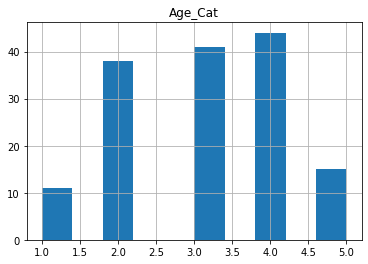

In [13]:
# Sample histogram for column "age ordinal"
df.hist("Age_Cat")

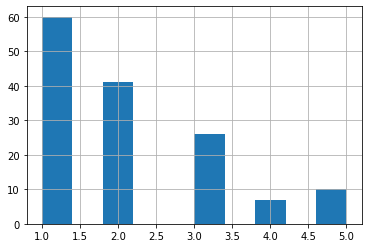

In [14]:
# Sample histogram for column "degree ordinal" with replace "?" with missing values
df.Degree_Cat.hist()

# CLUSTERING

## Dimensionality reduction

In [15]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [16]:
%pip -q install umap-learn

     |████████████████████████████████| 81kB 4.0MB/s 
     |████████████████████████████████| 1.2MB 8.1MB/s 



TODO: visualization of the data with such attributes is flawed. 
Try: 
  (a) separate binary and numerical+categorical attributes and compare and combine both mappers
      (see https://umap-learn.readthedocs.io/en/latest/composing_models.html?highlight=scaling#diamonds-dataset-example)
  (b) discard numerical attributes, binarize all remaining non-binary and use a metric for binary data



Text(0.5, 1.0, 'UMAP projection of IPM')

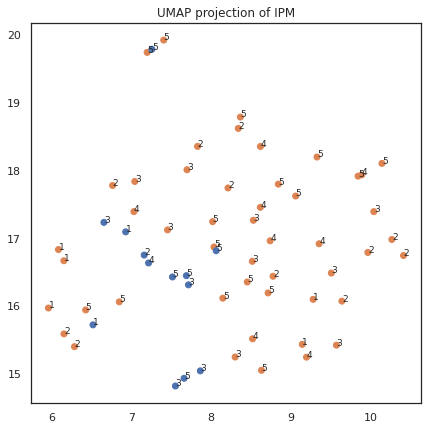

In [17]:
import umap

# df_noNaN = df.fillna(df.mean())
df_noNaN = df.dropna(how="any")


print('''
TODO: visualization of the data with such attributes is flawed. 
Try: 
  (a) separate binary and numerical+categorical attributes and compare and combine both mappers
      (see https://umap-learn.readthedocs.io/en/latest/composing_models.html?highlight=scaling#diamonds-dataset-example)
  (b) discard numerical attributes, binarize all remaining non-binary and use a metric for binary data
''')

scaled_array = StandardScaler().fit_transform(df_noNaN)
scaled_df = pd.DataFrame(scaled_array, columns=df_noNaN.columns)

reducer = umap.UMAP(n_neighbors=5, random_state=123, metric='euclidean')
embedding = reducer.fit_transform(scaled_df)

fig, ax = plt.subplots(figsize=(7,7))
xs = embedding[:, 0]
ys = embedding[:, 1] 

ax.scatter(xs, ys, c=[sns.color_palette()[int(x)] for x in df_noNaN['Already_used_DSS']])

for i, val in enumerate(df_noNaN['Income_Cat'].values.tolist()):
    ax.annotate(str(int(val)), (xs[i], ys[i]), fontsize=9)
plt.title('UMAP projection of IPM')

In [18]:
scaled_df

,Age_Cat,Gender_1male,Degree_Cat,Farm_size_Cat,ProductionUse_selling,Farm_type_Conventional,Farm_type_Intergrated,Farm_type_Organic,Farm_type_Biodynamic,Income_Cat,Proportion_of_income,Production_level,Crop_ArableCrops,Crop_Mixed,Crop_Animal,Crop_Orchards,Crop_Vineyard,Crop_Vegetables,Crop_Flowers,Crop_Others,Legislative_requirements,Own_phone,Years_own_phone,Agricultural_app_use_Cat,Computer_at_home,Speed_internet_Cat,Already_used_DSS,Prefered_access_Phone,Prefered_access_PC,Prefered_access_Advisor,Willing_to_try_new_products_Cat,Price_important_factor,DSS_for_ShortLongTermBothDecision_Cat,Prefered_type_Web_Software_Both_Cat,Importance_of_easy_to_use,Importance_of_efficient,Importance_low_price,Importance_polyvalence,Enjoy_using_new_techs,Appreciate_change,Trust_in_DSS,Trust_in_colleague_advice,Trust_advice_friend,Need_IT_teaching_Cat,Output_preference_Cat,WTP_for_DSS_Cat,DSS_must_be_tailored_for_your_farm_Cat,Marketing_info_about_DSS_Cat,Manufacturer_demo_of_DSS_Cat
0,-0.866057,0.262613,-0.900276,0.508934,0.327327,0.715678,-0.794719,-0.327327,0.0,-0.996583,0.742785,0.492808,0.515079,-0.515079,-0.225494,-0.262613,-0.262613,-0.327327,-0.225494,-0.296174,0.412082,0.0,0.162848,-0.162758,0.0,-0.830994,-1.941451,0.464420,1.504380,1.851640,-0.564933,0.3849,-0.956730,-0.621757,0.526201,0.771744,0.000000,0.735756,-1.412957,-1.079763,0.254355,-0.019371,0.044037,0.606339,0.722867,-0.726752,-0.092803,0.534127,0.432832
1,-0.866057,0.262613,-0.900276,0.508934,0.327327,-1.397276,1.258306,-0.327327,0.0,1.134042,-2.343857,-0.332978,-1.941451,1.941451,-0.225494,-0.262613,-0.262613,-0.327327,-0.225494,-0.296174,0.412082,0.0,0.162848,1.098614,0.0,-0.830994,0.515079,0.464420,-0.664726,-0.540062,-0.564933,0.3849,-0.956730,-0.621757,0.526201,0.771744,-0.779643,-0.124940,-0.586510,-1.079763,-0.621757,-1.220371,-0.866057,0.606339,0.722867,0.775203,-0.092803,0.534127,0.432832
2,-1.776150,0.262613,-0.900276,-3.277534,0.327327,0.715678,-0.794719,-0.327327,0.0,-1.706791,0.742785,1.318594,0.515079,-0.515079,-0.225494,-0.262613,-0.262613,-0.327327,-0.225494,-0.296174,-2.426703,0.0,-0.867416,-0.162758,0.0,0.730268,0.515079,-2.153222,-0.664726,1.851640,1.770122,0.3849,-0.956730,1.130467,0.526201,0.771744,1.559286,0.735756,0.239936,0.615055,-0.621757,1.181629,0.954130,-1.273312,0.722867,-0.726752,1.825130,-1.413865,0.432832
3,-1.776150,0.262613,-0.900276,-2.015378,0.327327,0.715678,-0.794719,-0.327327,0.0,-1.706791,0.742785,2.144381,0.515079,-0.515079,-0.225494,-0.262613,-0.262613,-0.327327,-0.225494,-0.296174,-2.426703,0.0,-0.867416,-1.424130,0.0,-0.830994,0.515079,-2.153222,-0.664726,1.851640,1.770122,0.3849,-0.956730,1.130467,-0.956730,-0.557370,0.000000,-0.985636,1.066382,0.615055,0.254355,1.181629,0.954130,0.606339,0.722867,-0.726752,-2.010737,0.534127,-1.356208
4,-0.866057,0.262613,0.871695,0.508934,-3.055050,0.715678,-0.794719,-0.327327,0.0,-0.996583,-0.769669,-0.332978,-1.941451,1.941451,-0.225494,-0.262613,-0.262613,-0.327327,-0.225494,-0.296174,-2.426703,0.0,1.193113,-1.424130,0.0,0.730268,0.515079,0.464420,-0.664726,-0.540062,1.770122,0.3849,0.526201,-0.621757,0.526201,0.771744,0.000000,-1.846332,1.066382,-0.232354,-0.621757,-1.220371,0.044037,0.606339,-1.463365,-0.726752,-0.092803,0.534127,0.432832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0.044037,0.262613,-0.014290,0.508934,0.327327,-1.397276,1.258306,-0.327327,0.0,-0.286374,0.434121,-1.984551,0.515079,-0.515079,-0.225494,-0.262613,-0.262613,-0.327327,-0.225494,-0.296174,0.412082,0.0,3.253641,1.098614,0.0,0.730268,0.515079,-2.153222,-0.664726,1.851640,-0.564933,0.3849,-0.956730,-0.621757,0.526201,-1.886484,0.000000,0.735756,-1.412957,-0.232354,0.254355,-0.019371,-0.866057,0.606339,0.722867,-0.726752,1.825130,0.534127,0.432832
58,0.044037,0.262613,-0.014290,0.508934,0.327327,-1.397276,1.258306,-0.327327,0.0,0.423834,0.742785,-0.332978,0.

In [19]:
df

,Age_Cat,Gender_1male,Degree_Cat,Farm_size_Cat,ProductionUse_selling,Farm_type_Conventional,Farm_type_Intergrated,Farm_type_Organic,Farm_type_Biodynamic,Income_Cat,Proportion_of_income,Production_level,Crop_ArableCrops,Crop_Mixed,Crop_Animal,Crop_Orchards,Crop_Vineyard,Crop_Vegetables,Crop_Flowers,Crop_Others,Legislative_requirements,Own_phone,Years_own_phone,Agricultural_app_use_Cat,Computer_at_home,Speed_internet_Cat,Already_used_DSS,Prefered_access_Phone,Prefered_access_PC,Prefered_access_Advisor,Willing_to_try_new_products_Cat,Price_important_factor,DSS_for_ShortLongTermBothDecision_Cat,Prefered_type_Web_Software_Both_Cat,Importance_of_easy_to_use,Importance_of_efficient,Importance_low_price,Importance_polyvalence,Enjoy_using_new_techs,Appreciate_change,Trust_in_DSS,Trust_in_colleague_advice,Trust_advice_friend,Need_IT_teaching_Cat,Output_preference_Cat,WTP_for_DSS_Cat,DSS_must_be_tailored_for_your_farm_Cat,Marketing_info_about_DSS_Cat,Manufacturer_demo_of_DSS_Cat
0,4,1.0,5.0,5.0,1.0,1.0,1.0,0.0,0.0,NaN,0.0,7.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0,2.0,1,3,0.0,NaN,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,1.0,2.0,2.0,1.0,NaN,1.0,1.0,1.0,1.0
1,4,1.0,1.0,4.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,0,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,7.0,6.0,2.0,4.0,2.0,NaN,1.0,2.0,2.0,2.0
2,2,1.0,1.0,5.0,1.0,1.0,0.0,0.0,0.0,2.0,100.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,10,2.0,1,2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7.0,7.0,5.0,7.0,4.0,4.0,5.0,5.0,5.0,2.0,3.0,2.0,2.0,2.0,2.0
3,2,1.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0,5.0,90.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,10,NaN,1,2,0.0,1.0,0.0,0.0,1.0,1.0,2.0,2.0,7.0,6.0,4.0,6.0,6.0,6.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0,NaN,1.0
4,2,1.0,1.0,5.0,1.0,0.0,1.0,0.0,0.0,5.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,10,3.0,1,2,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,7.0,7.0,4.0,6.0,5.0,4.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,4,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,2.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,22,NaN,1,2,NaN,0.0,1.0,0.0,1.0,0.0,1.0,1.0,4.0,7.0,4.0,6.0,7.0,7.0,6.0,2.0,2.0,2.0,3.0,2.0,2.0,NaN,1.0
145,3,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,1.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,23,NaN,1,3,NaN,0.0,1.0,0.0,1.0,0.0,2.0,1.0,NaN,5.0,NaN,5.0,6.0,5.0,5.0,1.0,1.0,2.0,3.0,3.0,2.0,2.0,1.0
146,2,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN,4.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1,16,NaN,1,3,NaN,1.0,0.0,0.0,1.0,1.0,3.0,1.0,4.0,7.0,4.0,7.0,7.0,7.0,5.0,3.0,2.0,2.0,1.0,3.0,2.0,NaN,1.0
147,3,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,3.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,22,NaN,1,3,NaN,0.0,1.0,0.0,1.0,0.0,2.0,1.0,5.0,5.0,2.0,6.0,6.0,7.0,5.0,3.0,2.0,2.0,3.0,2.0,2.0,1.0,1.0


# create dictionary with value mapping

In [23]:
df["test"] = df["Age_Cat"].replace({4:"več kot 50", 3: "test", 1 : "sdfsdf", 2 : "wsf"})
df["Age_Cat"] = df["Age_Cat"].replace({4:"več kot 50", 3: "test", 1 : "sdfsdf", 2 : "wsf"})

,Age_Cat,Gender_1male,Degree_Cat,Farm_size_Cat,ProductionUse_selling,Farm_type_Conventional,Farm_type_Intergrated,Farm_type_Organic,Farm_type_Biodynamic,Income_Cat,Proportion_of_income,Production_level,Crop_ArableCrops,Crop_Mixed,Crop_Animal,Crop_Orchards,Crop_Vineyard,Crop_Vegetables,Crop_Flowers,Crop_Others,Legislative_requirements,Own_phone,Years_own_phone,Agricultural_app_use_Cat,Computer_at_home,Speed_internet_Cat,Already_used_DSS,Prefered_access_Phone,Prefered_access_PC,Prefered_access_Advisor,Willing_to_try_new_products_Cat,Price_important_factor,DSS_for_ShortLongTermBothDecision_Cat,Prefered_type_Web_Software_Both_Cat,Importance_of_easy_to_use,Importance_of_efficient,Importance_low_price,Importance_polyvalence,Enjoy_using_new_techs,Appreciate_change,Trust_in_DSS,Trust_in_colleague_advice,Trust_advice_friend,Need_IT_teaching_Cat,Output_preference_Cat,WTP_for_DSS_Cat,DSS_must_be_tailored_for_your_farm_Cat,Marketing_info_about_DSS_Cat,Manufacturer_demo_of_DSS_Cat,test
0,4,1.0,5.0,5.0,1.0,1.0,1.0,0.0,0.0,NaN,0.0,7.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0,2.0,1,3,0.0,NaN,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,1.0,2.0,2.0,1.0,NaN,1.0,1.0,1.0,1.0,več kot 50
1,4,1.0,1.0,4.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,0,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,7.0,6.0,2.0,4.0,2.0,NaN,1.0,2.0,2.0,2.0,več kot 50
2,2,1.0,1.0,5.0,1.0,1.0,0.0,0.0,0.0,2.0,100.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,10,2.0,1,2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7.0,7.0,5.0,7.0,4.0,4.0,5.0,5.0,5.0,2.0,3.0,2.0,2.0,2.0,2.0,wsf
3,2,1.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0,5.0,90.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,10,NaN,1,2,0.0,1.0,0.0,0.0,1.0,1.0,2.0,2.0,7.0,6.0,4.0,6.0,6.0,6.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0,NaN,1.0,wsf
4,2,1.0,1.0,5.0,1.0,0.0,1.0,0.0,0.0,5.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,10,3.0,1,2,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,7.0,7.0,4.0,6.0,5.0,4.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0,2.0,2.0,wsf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,4,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,2.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,22,NaN,1,2,NaN,0.0,1.0,0.0,1.0,0.0,1.0,1.0,4.0,7.0,4.0,6.0,7.0,7.0,6.0,2.0,2.0,2.0,3.0,2.0,2.0,NaN,1.0,več kot 50
145,3,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,1.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,23,NaN,1,3,NaN,0.0,1.0,0.0,1.0,0.0,2.0,1.0,NaN,5.0,NaN,5.0,6.0,5.0,5.0,1.0,1.0,2.0,3.0,3.0,2.0,2.0,1.0,test
146,2,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN,4.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1,16,NaN,1,3,NaN,1.0,0.0,0.0,1.0,1.0,3.0,1.0,4.0,7.0,4.0,7.0,7.0,7.0,5.0,3.0,2.0,2.0,1.0,3.0,2.0,NaN,1.0,wsf
147,3,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,3.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,22,NaN,1,3,NaN,0.0,1.0,0.0,1.0,0.0,2.0,1.0,5.0,5.0,2.0,6.0,6.0,7.0,5.0,3.0,2.0,2.0,3.0,2.0,2.0,1.0,1.0,test
